<a href="https://colab.research.google.com/github/rediahmds/eco-sort/blob/main/train/yolov8-ecosort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

EcoSort is an IoT devices that classifies waste with the help of YOLOv8.

This notebook written based on:

- [How to Train YOLOv8 Object Detection on a Custom Dataset](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/)
- [Train YOLOv8 on Custom Dataset – A Complete Tutorial](https://learnopencv.com/train-yolov8-on-custom-dataset/)

> Note: Run this notebook on Google Colab to eliminate basic setups.

## Tech Stack

- Python v3.12
- ESP32
- Blynk

## Setup

We are gonna need `ultralytics` and `coreml`.

### Install `ultralytics`

This package provides APIs to interact with the training, models, etc.

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

### Install `clearml`

Used to monitor deep learning experiments. YOLOv8 integrates nicely with this tool!

In [2]:
!pip install clearml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.0 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.10.1
    Uninstalling PyJWT-2.10.1:
      Successfully uninstalled PyJWT-2.10.1


### Setup ClearML Credentials

Go ahead and sign-up/sign-in to [AI Infrastructure Platform | Maximize AI Performance & Scalability | ClearML](https://app.clear.ml/dashboard)

After that, go to Settings `->` Workspace `->` Create new credentials

The new credentials will be created and shows two options:

- Local Python (Recommended)
- Jupyter Notebook

Both actually are the same things, it only differs on how to use the new credentials.

This time, use the `clearml` CLI app to consume the credentials, when prompted, paste it.

Now, any YOLOv8 training experiments that you run in this notebook will be logged into ClearML dashboard.

In [3]:
!clearml-init

ClearML SDK setup process

Please create new clearml credentials through the settings page in your `clearml-server` web app (e.g. http://localhost:8080//settings/workspace-configuration) 
Or create a free account at https://app.clear.ml/settings/workspace-configuration

In settings page, press "Create new credentials", then press "Copy to clipboard".

Paste copied configuration here:
api {   # Redi Ahmad Supriyatna's workspace   web_server: https://app.clear.ml/   api_server: https://api.clear.ml   files_server: https://files.clear.ml   credentials {     "access_key" = "O08MXVLJIEX4FO0SV7NPV5PNR7LZ0N"     "secret_key" = "3NdiyMzCJJiLoCHHahsw0OX71U690dOQZtt5ei3RlvxlNYl47Ype8Uz-yIFCyMrV4wM"   } }
Detected credentials key="O08MXVLJIEX4FO0SV7NPV5PNR7LZ0N" secret="3Ndi***"

ClearML Hosts configuration:
Web App: https://app.clear.ml/
API: https://api.clear.ml
File Store: https://files.clear.ml

Verifying credentials ...
Credentials verified!

New configuration stored in /root/clearml.conf
Cl

## Download the dataset

This time, use `roboflow` package to download the dataset.

Datasets:

- [Sampah Dataset > Overview](https://universe.roboflow.com/23222311-haidaravi-ardi-dis8z/sampah-t92ox)

Kudos and big thanks to the dataset creators.

In [4]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [6]:
from roboflow import Roboflow

apikey = input("Roboflow API Key: ")

# Use API KEY from roboflow
rf = Roboflow(api_key=apikey)
project = rf.workspace("23222311-haidaravi-ardi-dis8z").project("sampah-t92ox")
version = project.version(1)
dataset = version.download("yolov8")


Roboflow API Key: OH4XqDahvc4TUpMwn9Ex
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Sampah-1 in yolov8:: 100%|██████████| 2794/2794 [00:00<00:00, 7646.06it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Train

Choose model variants

### [Optional] Keep session awake

Per 2021, Google Colab will ask if current session in use or not (idle). That said, the training process might consumes a huge amount of time and Colab system might stops the session mid-training process. So, as a solution, a cell must keep running.

In [8]:
while True:
    pass

KeyboardInterrupt: 

100%|██████████| 6.25M/6.25M [00:00<00:00, 100MB/s]


Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Sampah-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=64, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8-ecosort.pt, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 975.3±234.7 MB/s, size: 32.4 KB)


train: Scanning /content/Sampah-1/train/labels... 1080 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1080/1080 [00:00<00:00, 2237.51it/s]

train: New cache created: /content/Sampah-1/train/labels.cache


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9, len(boxes) = 3209. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 380.3±170.2 MB/s, size: 41.5 KB)


val: Scanning /content/Sampah-1/valid/labels... 207 images, 0 backgrounds, 0 corrupt: 100%|██████████| 207/207 [00:00<00:00, 1391.16it/s]

val: New cache created: /content/Sampah-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 525. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/yolov8-ecosort.pt/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8-ecosort.pt
Starting training for 64 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/64     0.262G      1.518      2.906      1.719          4        640: 100%|██████████| 1080/1080 [01:28<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:06<00:00, 16.82it/s]


                   all        207        525       0.26      0.374      0.242      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/64     0.291G      1.611      2.724      1.815          1        640:  88%|████████▊ | 946/1080 [01:14<00:14,  9.25it/s]

ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


       2/64     0.291G      1.607      2.713      1.815          1        640: 100%|██████████| 1080/1080 [01:23<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 18.19it/s]


                   all        207        525       0.24      0.264      0.182     0.0903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/64     0.307G      1.684      2.574      1.888         10        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.01it/s]

                   all        207        525      0.247      0.221      0.173     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/64     0.324G      1.679      2.494      1.905         14        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.53it/s]

                   all        207        525      0.383       0.26      0.253      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/64     0.342G      1.652      2.281      1.891          5        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 20.96it/s]


                   all        207        525      0.404      0.346      0.299       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/64     0.359G      1.616      2.228       1.85         20        640: 100%|██████████| 1080/1080 [01:23<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 18.15it/s]

                   all        207        525      0.312      0.325      0.229      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/64     0.375G      1.617      2.121      1.823          3        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.49it/s]


                   all        207        525      0.355       0.36      0.267      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/64     0.393G      1.561      2.052      1.802          5        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 25.01it/s]

                   all        207        525       0.47      0.383      0.333      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/64      0.41G      1.515      1.937      1.771          9        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 20.81it/s]

                   all        207        525      0.269      0.373      0.216       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/64     0.428G      1.524      1.912      1.775          3        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 19.30it/s]


                   all        207        525      0.497      0.412      0.375       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/64     0.443G      1.501      1.915      1.723          2        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.14it/s]

                   all        207        525      0.471      0.431       0.35      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/64     0.461G      1.475       1.87      1.713          4        640: 100%|██████████| 1080/1080 [01:26<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 20.04it/s]

                   all        207        525      0.295      0.385      0.249      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/64     0.479G      1.436      1.785      1.685         12        640: 100%|██████████| 1080/1080 [01:26<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.13it/s]


                   all        207        525      0.392      0.411      0.317      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/64     0.494G      1.464      1.787      1.705         10        640: 100%|██████████| 1080/1080 [01:27<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.48it/s]

                   all        207        525      0.466      0.376      0.355      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/64     0.512G      1.443      1.727      1.693          5        640: 100%|██████████| 1080/1080 [01:27<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 18.44it/s]

                   all        207        525      0.372      0.374       0.27      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/64     0.529G      1.422      1.721      1.662          1        640: 100%|██████████| 1080/1080 [01:26<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.01it/s]

                   all        207        525      0.537       0.44      0.408      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/64     0.545G      1.373      1.674      1.652          3        640: 100%|██████████| 1080/1080 [01:26<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 22.32it/s]

                   all        207        525      0.472      0.447      0.405      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/64     0.562G      1.415       1.63      1.658         29        640: 100%|██████████| 1080/1080 [01:27<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 21.67it/s]

                   all        207        525      0.434      0.448      0.354      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/64      0.58G      1.386      1.581      1.649          2        640: 100%|██████████| 1080/1080 [01:27<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.81it/s]

                   all        207        525      0.516      0.466      0.433      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/64     0.598G      1.399      1.615      1.649          4        640: 100%|██████████| 1080/1080 [01:26<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 18.24it/s]

                   all        207        525        0.5      0.448      0.423      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/64     0.613G      1.368       1.56      1.621          1        640: 100%|██████████| 1080/1080 [01:26<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.46it/s]


                   all        207        525      0.516      0.437      0.444      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/64     0.631G      1.352      1.552      1.614          9        640: 100%|██████████| 1080/1080 [01:27<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 22.77it/s]

                   all        207        525      0.516      0.431      0.446      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/64     0.648G      1.358      1.536      1.609          3        640: 100%|██████████| 1080/1080 [01:27<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 21.39it/s]


                   all        207        525      0.587      0.486      0.482       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/64     0.666G       1.34       1.56      1.611         11        640: 100%|██████████| 1080/1080 [01:26<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.53it/s]


                   all        207        525      0.533      0.504      0.469      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/64     0.682G      1.312      1.463      1.598          4        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 21.10it/s]


                   all        207        525      0.447      0.499      0.401      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/64     0.699G      1.313      1.451       1.59         11        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 22.72it/s]

                   all        207        525      0.516      0.453       0.44      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/64     0.717G      1.321       1.44      1.592         16        640: 100%|██████████| 1080/1080 [01:23<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 19.91it/s]

                   all        207        525      0.548       0.47      0.466      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/64     0.734G      1.299      1.455      1.562          4        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 22.64it/s]

                   all        207        525      0.552      0.519      0.484      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/64      0.75G      1.281      1.436      1.544          3        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.08it/s]

                   all        207        525      0.642      0.462      0.508      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/64     0.768G      1.272      1.421      1.542          4        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.96it/s]

                   all        207        525       0.59      0.506      0.517       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/64     0.785G      1.279      1.369      1.549          2        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 22.39it/s]

                   all        207        525      0.631      0.489      0.529      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/64     0.801G      1.275      1.366      1.555          3        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 19.91it/s]

                   all        207        525      0.624      0.535      0.553      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/64     0.818G      1.242      1.362      1.524          2        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.42it/s]

                   all        207        525      0.653       0.54      0.548      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/64     0.836G      1.261      1.377      1.544          1        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.60it/s]

                   all        207        525      0.584      0.515      0.502      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/64     0.854G      1.251      1.338      1.527          5        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 22.64it/s]

                   all        207        525      0.745      0.482       0.59      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/64     0.871G       1.24      1.315      1.517          4        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 19.77it/s]


                   all        207        525      0.637      0.521       0.55      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/64     0.887G       1.21      1.294      1.499          3        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.79it/s]


                   all        207        525      0.597      0.565       0.56      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/64     0.904G      1.245      1.265      1.524          7        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 25.39it/s]

                   all        207        525      0.625      0.541      0.572       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/64     0.922G      1.213      1.258      1.508          1        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.90it/s]


                   all        207        525      0.601      0.519      0.543      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/64     0.939G      1.199      1.258      1.475         28        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.77it/s]

                   all        207        525      0.652      0.529       0.56      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/64     0.955G      1.202      1.257      1.489          8        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 20.30it/s]

                   all        207        525      0.658      0.554       0.58      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/64     0.973G      1.197      1.241      1.483          2        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 22.30it/s]


                   all        207        525      0.592      0.534       0.54      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/64      0.99G      1.207       1.22      1.496          2        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.91it/s]

                   all        207        525      0.679      0.534      0.583      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/64      1.01G      1.192      1.235      1.485         12        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 25.35it/s]

                   all        207        525      0.625      0.522      0.552      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/64      1.02G      1.187      1.202      1.485          1        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 20.73it/s]

                   all        207        525      0.698       0.55      0.627      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/64      1.04G      1.186      1.173       1.48          2        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 20.61it/s]

                   all        207        525      0.676      0.587      0.604      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/64      1.06G      1.179      1.159      1.456          5        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.53it/s]


                   all        207        525       0.65      0.554      0.571      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/64      1.07G      1.177      1.132      1.468          9        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.41it/s]

                   all        207        525      0.631      0.554      0.568       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/64      1.09G      1.154      1.136      1.464          2        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.48it/s]


                   all        207        525      0.708      0.526      0.609      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/64      1.11G      1.195      1.172        1.5          2        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 20.90it/s]

                   all        207        525      0.646      0.566        0.6      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/64      1.13G      1.139      1.136      1.446         12        640: 100%|██████████| 1080/1080 [01:23<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 20.98it/s]


                   all        207        525      0.715      0.494      0.574      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/64      1.14G      1.132      1.085      1.438          2        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 22.73it/s]

                   all        207        525      0.667      0.576      0.609      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/64      1.16G      1.133      1.084      1.443          1        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.55it/s]

                   all        207        525      0.593      0.554      0.551      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/64      1.18G      1.101      1.053      1.411          3        640: 100%|██████████| 1080/1080 [01:26<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.01it/s]

                   all        207        525      0.691      0.556      0.597      0.386


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/64      1.19G      1.023      0.957      1.391          1        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 20.08it/s]

                   all        207        525      0.654       0.55      0.579      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/64      1.21G      1.004     0.9121      1.372         10        640: 100%|██████████| 1080/1080 [01:23<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 20.61it/s]

                   all        207        525      0.658      0.546      0.585      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/64      1.23G      0.984     0.8583      1.346          6        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.20it/s]

                   all        207        525      0.671      0.577      0.621      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/64      1.24G     0.9753     0.8266      1.334          7        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.79it/s]

                   all        207        525      0.648      0.539      0.581      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/64      1.26G     0.9621     0.8244      1.343          1        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.98it/s]

                   all        207        525      0.661      0.592      0.613      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/64      1.28G     0.9567     0.7914      1.335          1        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 22.53it/s]

                   all        207        525      0.669      0.584       0.61      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/64      1.29G     0.9466     0.7883      1.323          9        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:05<00:00, 20.01it/s]

                   all        207        525      0.696      0.597      0.624      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/64      1.31G     0.9398       0.75      1.309          1        640: 100%|██████████| 1080/1080 [01:24<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 21.89it/s]

                   all        207        525       0.65      0.588      0.605      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/64      1.33G     0.9366     0.7539      1.315          1        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 23.94it/s]


                   all        207        525      0.622      0.559      0.589      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/64      1.35G       0.93     0.7418      1.312          1        640: 100%|██████████| 1080/1080 [01:25<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:04<00:00, 24.70it/s]

                   all        207        525      0.636      0.595      0.608       0.39



64 epochs completed in 1.605 hours.
Optimizer stripped from runs/detect/yolov8-ecosort.pt/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolov8-ecosort.pt/weights/best.pt, 6.3MB

Validating runs/detect/yolov8-ecosort.pt/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:03<00:00, 26.34it/s]


                   all        207        525      0.668      0.575      0.622      0.403
           non_organic         88        226       0.53      0.509      0.487      0.313
               organic        142        299      0.805      0.642      0.758      0.492
Speed: 0.5ms preprocess, 9.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/yolov8-ecosort.pt
2025-05-19 07:40:10,991 - clearml.storage - INFO - Uploading: 5.96MB to runs/detect/yolov8-ecosort.pt/weights/best.pt


████████████████████████████████▉ 100% | 5.96/5.96 MB [00:00<00:00, 29.69MB/s]: 

2025-05-19 07:40:11,207 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/Ultralytics/yolov8-ecosort.pt.e901ee2a76444054a023f1ed99c2478e/models/best.pt


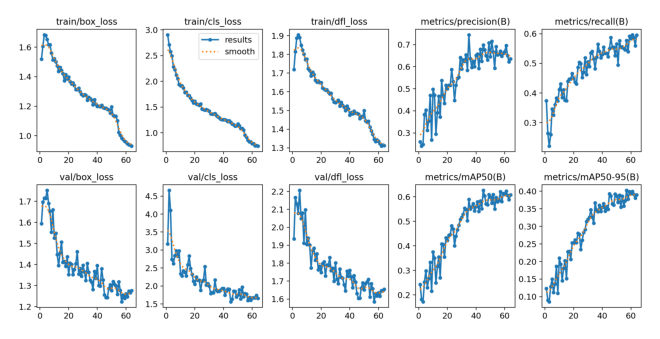

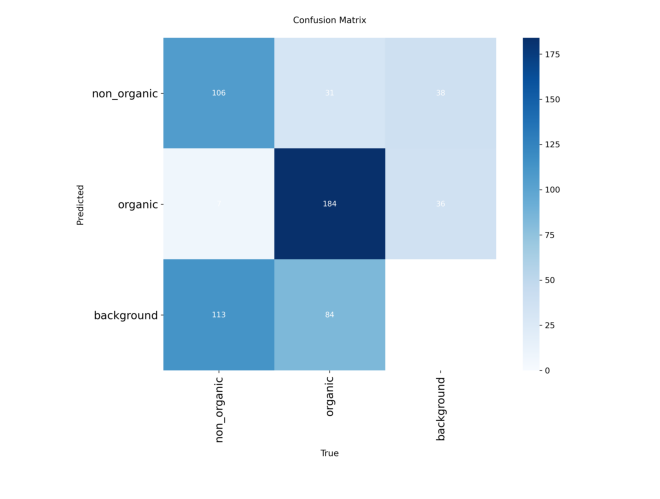

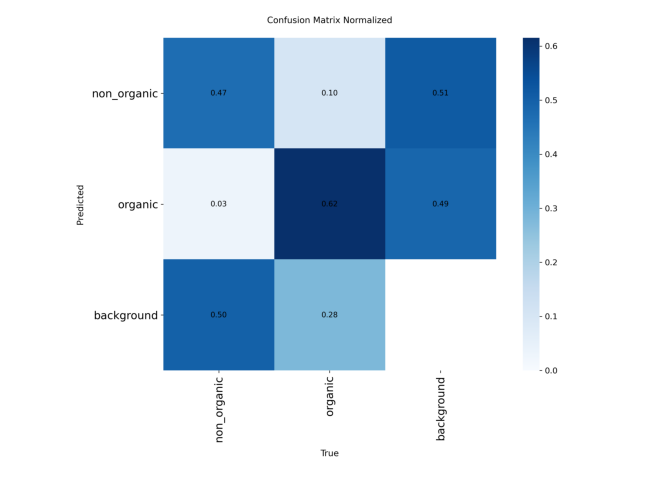

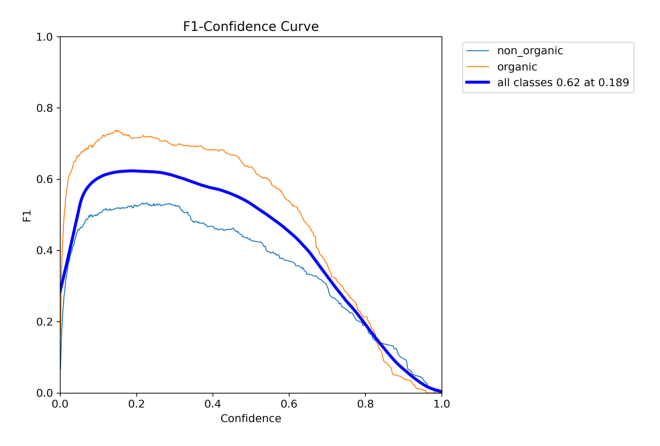

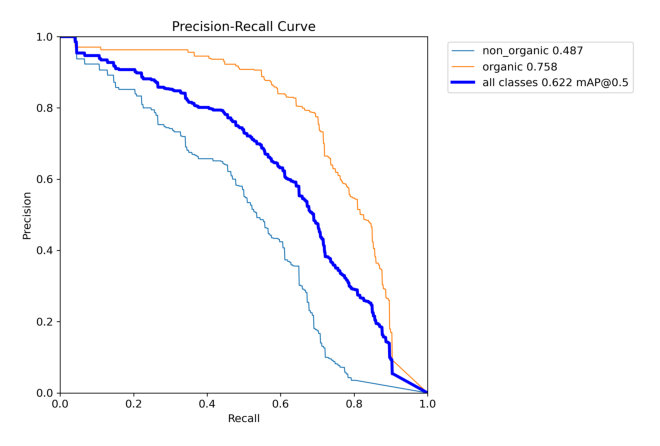

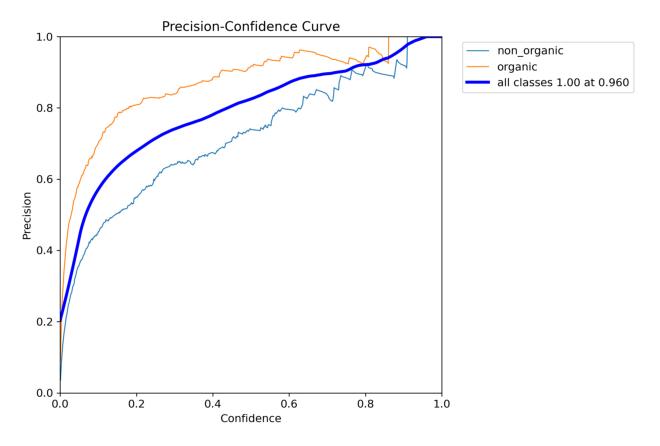

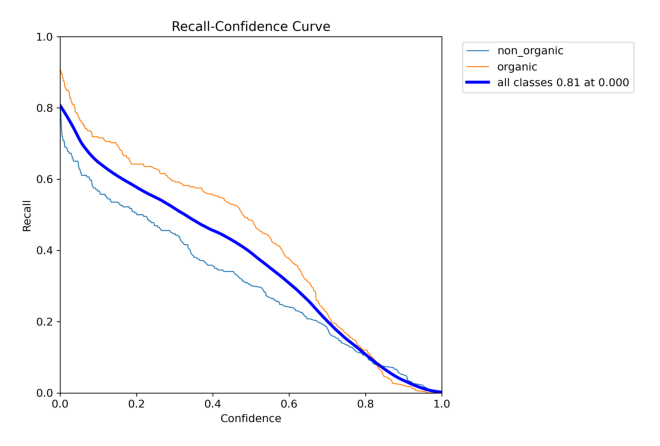

In [7]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

train_results = model.train(
    data="Sampah-1/data.yaml",
    imgsz=640,
    epochs=64,
    batch=1,
    name="yolov8-ecosort.pt"
)